In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from env import user, password, host
from scipy import stats
from scipy.stats import levene, ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [2]:
df22 = pd.read_csv('CAMPUS_summary_22.csv')
df21 = pd.read_csv('CAMPUS_summary_21.csv')
df20 = pd.read_csv('CAMPUS_summary_20.csv')
df19 = pd.read_csv('CAMPUS_summary_19.csv')
df18 = pd.read_csv('CAMPUS_summary_18.csv')

In [3]:
df22.head()

,agg_level,campus_number,region,dist_name_num,charter_status,campus,section,heading,heading_name,student_count
0,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,533
1,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,A-PARTICIPATION,A02,CAMPUS DISCIPLINE POPULATION,27
2,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,A-PARTICIPATION,A03,CAMPUS DISCIPLINE RECORD COUNT,40
3,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,B-DISCIPLINE DATA TRENDS,B13,STUDENTS SUSPENDED OUT OF SCHOOL,27
4,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,F-OUT OF SCHOOL SUSPENSIONS,C24,BLACK OR AFRICAN AMERICAN,-999


In [4]:
df21.head()

,agg_level,campus_number,region,dist_name_num,charter_status,campus,section,heading,heading_name,student_count
0,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,853
1,CAMPUS SUMMARY,57816101,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,QUEST CAMPUS PRE-K THRU 8 057816101,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,682
2,CAMPUS SUMMARY,57816101,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,QUEST CAMPUS PRE-K THRU 8 057816101,A-PARTICIPATION,A02,CAMPUS DISCIPLINE POPULATION,-999
3,CAMPUS SUMMARY,57816101,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,QUEST CAMPUS PRE-K THRU 8 057816101,A-PARTICIPATION,A03,CAMPUS DISCIPLINE RECORD COUNT,-999
4,CAMPUS SUMMARY,57816101,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,QUEST CAMPUS PRE-K THRU 8 057816101,B-DISCIPLINE DATA TRENDS,B13,STUDENTS SUSPENDED OUT OF SCHOOL,-999


In [5]:
df20.head()

,agg_level,campus_number,region,dist_name_num,charter_status,campus,section,heading,heading_name,student_count
0,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,1086
1,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,A-PARTICIPATION,A02,CAMPUS DISCIPLINE POPULATION,20
2,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,A-PARTICIPATION,A03,CAMPUS DISCIPLINE RECORD COUNT,32
3,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,B-DISCIPLINE DATA TRENDS,B10,COUNT OF STUDENTS SUSPENDED IN SCHOOL,-999
4,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,GENESIS CAMPUS PRE-K THRU 5 057816102,B-DISCIPLINE DATA TRENDS,B13,STUDENTS SUSPENDED OUT OF SCHOOL,16


In [6]:
df19.head()

,agg_level,campus_number,region,dist_name_num,charter_status,campus,section,heading,heading_name,student_count
0,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,A W BROWN - F L A EARLY CHILDHOOD 057816102,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,1291
1,CAMPUS SUMMARY,57816101,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,AW BROWN-F L A INT CAMPUS 057816101,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,961
2,CAMPUS SUMMARY,57829001,10,A+ ACADEMY 057829,OPEN ENROLLMENT CHARTER,A+ ACADEMY EL 057829001,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,853
3,CAMPUS SUMMARY,57829001,10,A+ ACADEMY 057829,OPEN ENROLLMENT CHARTER,A+ ACADEMY EL 057829001,A-PARTICIPATION,A02,CAMPUS DISCIPLINE POPULATION,24
4,CAMPUS SUMMARY,57829001,10,A+ ACADEMY 057829,OPEN ENROLLMENT CHARTER,A+ ACADEMY EL 057829001,A-PARTICIPATION,A03,CAMPUS DISCIPLINE RECORD COUNT,26


In [7]:
df18.head()

,agg_level,campus_number,region,dist_name_num,charter_status,campus,section,heading,heading_name,student_count
0,CAMPUS SUMMARY,57816102,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,A W BROWN - F L A EARLY CHILDHOOD 057816102,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,1278
1,CAMPUS SUMMARY,57816101,10,A W BROWN LEADERSHIP ACADEMY 057816,OPEN ENROLLMENT CHARTER,AW BROWN-F L A INT CAMPUS 057816101,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,1106
2,CAMPUS SUMMARY,57829001,10,A+ ACADEMY 057829,OPEN ENROLLMENT CHARTER,A+ ACADEMY EL 057829001,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,859
3,CAMPUS SUMMARY,57829002,10,A+ ACADEMY 057829,OPEN ENROLLMENT CHARTER,A+ SECONDARY SCHOOL 057829002,A-PARTICIPATION,A01,CAMPUS CUMULATIVE YEAR END ENROLLMENT,584
4,CAMPUS SUMMARY,57829001,10,A+ ACADEMY 057829,OPEN ENROLLMENT CHARTER,A+ ACADEMY EL 057829001,A-PARTICIPATION,A02,CAMPUS DISCIPLINE POPULATION,-999


In [8]:
def prep22(df):
    global df22
    df22['charter_encoded'] = df22.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})
    df22=df22[(df22.heading == 'A01') | (df22.heading ==  'A03')]
    df22=df22[df22['student_count'] != '-999']
    df22['student_count']= df22['student_count'].str.replace("<", "")
    df22['student_count'] = df22['student_count'].astype(float)
    dfpivot=df22.pivot(index='campus_number', columns='heading', values= 'student_count').dropna()
    df22=df22.merge(dfpivot,how= 'right', on= 'campus_number')
    df22=df22.rename(columns={'A01': 'student_enrollment', 'A03':'discipline_count'})
    df22['discipline_percent']= ((df22['discipline_count']/df22['student_enrollment'])*100)
    df22=df22.round({'discipline_percent': 0})
    df22=df22.drop(columns=['agg_level', 'campus_number', 'region', 'charter_status', 'dist_name_num', 'student_count','section', 'heading', 'heading_name', 'student_count'])
    df22=df22.drop_duplicates()
    df22=df22.reset_index(drop=True)

In [9]:
prep22(df22)

In [10]:
df22.head()

,campus,charter_encoded,student_enrollment,discipline_count,discipline_percent
0,CAYUGA H S 001902001,0,173.0,37.0,21.0
1,ELKHART H S 001903001,0,335.0,141.0,42.0
2,ELKHART MIDDLE 001903041,0,309.0,65.0,21.0
3,ELKHART INT 001903102,0,295.0,40.0,14.0
4,FRANKSTON H S 001904001,0,248.0,101.0,41.0


In [11]:
def prep21(df):
    global df21
    df21['charter_encoded'] = df21.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})
    df21=df21[(df21.heading == 'A01') | (df21.heading ==  'A03')]
    df21=df21[df21['student_count'] != '-999']
    df21['student_count']= df21['student_count'].str.replace("<", "")
    df21['student_count'] = df21['student_count'].astype(float)
    dfpivot=df21.pivot(index='campus_number', columns='heading', values= 'student_count').dropna()
    df21=df21.merge(dfpivot,how= 'right', on= 'campus_number')
    df21=df21.rename(columns={'A01': 'student_enrollment', 'A03':'discipline_count'})
    df21['discipline_percent']= ((df21['discipline_count']/df21['student_enrollment'])*100)
    df21=df21.round({'discipline_percent': 0})
    df21=df21.drop(columns=['agg_level', 'campus_number', 'region', 'charter_status', 'dist_name_num', 'student_count','section', 'heading', 'heading_name', 'student_count'])
    df21=df21.drop_duplicates()
    df21=df21.reset_index(drop=True)

In [12]:
prep21(df21)

In [13]:
df21.head()

,campus,charter_encoded,student_enrollment,discipline_count,discipline_percent
0,CAYUGA H S 001902001,0,175.0,43.0,25.0
1,ELKHART H S 001903001,0,371.0,70.0,19.0
2,ELKHART MIDDLE 001903041,0,289.0,74.0,26.0
3,FRANKSTON H S 001904001,0,240.0,44.0,18.0
4,PALESTINE H S 001907001,0,1088.0,380.0,35.0


In [14]:
def prep20(df):
    global df20
    df20['charter_encoded'] = df20.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})
    df20=df20[(df20.heading == 'A01') | (df20.heading ==  'A03')]
    df20=df20[df20['student_count'] != '-999']
    df20['student_count']= df20['student_count'].str.replace("<", "")
    df20['student_count'] = df20['student_count'].astype(float)
    dfpivot=df20.pivot(index='campus_number', columns='heading', values= 'student_count').dropna()
    df20=df20.merge(dfpivot,how= 'right', on= 'campus_number')
    df20=df20.rename(columns={'A01': 'student_enrollment', 'A03':'discipline_count'})
    df20['discipline_percent']= ((df20['discipline_count']/df20['student_enrollment'])*100)
    df20=df20.round({'discipline_percent': 0})
    df20=df20.drop(columns=['agg_level', 'campus_number', 'region', 'charter_status', 'dist_name_num', 'student_count','section', 'heading', 'heading_name', 'student_count'])
    df20=df20.drop_duplicates()
    df20=df20.reset_index(drop=True)

In [15]:
prep20(df20)

In [16]:
df20.head()

,campus,charter_encoded,student_enrollment,discipline_count,discipline_percent
0,CAYUGA H S 001902001,0,186.0,57.0,31.0
1,ELKHART H S 001903001,0,409.0,188.0,46.0
2,ELKHART MIDDLE 001903041,0,283.0,49.0,17.0
3,FRANKSTON H S 001904001,0,251.0,16.0,6.0
4,FRANKSTON MIDDLE 001904041,0,197.0,15.0,8.0


In [17]:
def prep19(df):
    global df19
    df19['charter_encoded'] = df19.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})
    df19=df19[(df19.heading == 'A01') | (df19.heading ==  'A03')]
    df19=df19[df19['student_count'] != '-999']
    df19['student_count']= df19['student_count'].str.replace("<", "")
    df19['student_count'] = df19['student_count'].astype(float)
    dfpivot=df19.pivot(index='campus_number', columns='heading', values= 'student_count').dropna()
    df19=df19.merge(dfpivot,how= 'right', on= 'campus_number')
    df19=df19.rename(columns={'A01': 'student_enrollment', 'A03':'discipline_count'})
    df19['discipline_percent']= ((df19['discipline_count']/df19['student_enrollment'])*100)
    df19=df19.round({'discipline_percent': 0})
    df19=df19.drop(columns=['agg_level', 'campus_number', 'region', 'charter_status', 'dist_name_num', 'student_count','section', 'heading', 'heading_name', 'student_count'])
    df19=df19.drop_duplicates()
    df19=df19.reset_index(drop=True)

In [18]:
prep19(df19)

In [19]:
df19.head()

,campus,charter_encoded,student_enrollment,discipline_count,discipline_percent
0,CAYUGA H S 001902001,0,192.0,65.0,34.0
1,ELKHART H S 001903001,0,421.0,205.0,49.0
2,ELKHART MIDDLE 001903041,0,288.0,156.0,54.0
3,ELKHART EL 001903101,0,367.0,20.0,5.0
4,ELKHART INT 001903102,0,296.0,157.0,53.0


In [20]:
def prep18(df):
    global df18
    df18['charter_encoded'] = df18.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})
    df18=df18[(df18.heading == 'A01') | (df18.heading ==  'A03')]
    df18=df18[df18['student_count'] != '-999']
    df18['student_count']= df18['student_count'].str.replace("<", "")
    df18['student_count'] = df18['student_count'].astype(float)
    dfpivot=df18.pivot(index='campus_number', columns='heading', values= 'student_count').dropna()
    df18=df18.merge(dfpivot,how= 'right', on= 'campus_number')
    df18=df18.rename(columns={'A01': 'student_enrollment', 'A03':'discipline_count'})
    df18['discipline_percent']= ((df18['discipline_count']/df18['student_enrollment'])*100)
    df18=df18.round({'discipline_percent': 0})
    df18=df18.drop(columns=['agg_level', 'campus_number', 'region', 'charter_status', 'dist_name_num', 'student_count','section', 'heading', 'heading_name', 'student_count'])
    df18=df18.drop_duplicates()
    df18=df18.reset_index(drop=True)

In [21]:
prep18(df18)

In [22]:
df18.head()

,campus,charter_encoded,student_enrollment,discipline_count,discipline_percent
0,CAYUGA MIDDLE 001902041,0,155.0,38.0,25.0
1,ELKHART H S 001903001,0,411.0,205.0,50.0
2,ELKHART MIDDLE 001903041,0,298.0,151.0,51.0
3,ELKHART EL 001903101,0,379.0,11.0,3.0
4,ELKHART INT 001903102,0,276.0,151.0,55.0


In [23]:
def df_combine(a,b,c,d,e):
    df=pd.concat([df18,df19,df20,df21,df22], ignore_index=True)
    return(df)

In [24]:
df=df_combine(df18,df19,df20,df21,df22)

In [25]:
df.head()

,campus,charter_encoded,student_enrollment,discipline_count,discipline_percent
0,CAYUGA MIDDLE 001902041,0,155.0,38.0,25.0
1,ELKHART H S 001903001,0,411.0,205.0,50.0
2,ELKHART MIDDLE 001903041,0,298.0,151.0,51.0
3,ELKHART EL 001903101,0,379.0,11.0,3.0
4,ELKHART INT 001903102,0,276.0,151.0,55.0


In [26]:
def split_tea_data(df):
    '''
    This function performs split on tea data, stratify charter_encoded.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.charter_encoded)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.charter_encoded)
    return train, validate, test

In [27]:
train, validate, test=split_tea_data(df)

In [28]:
train.head()

,campus,charter_encoded,student_enrollment,discipline_count,discipline_percent
14461,IRVIN H S 071902008,0,1300.0,159.0,12.0
15829,VETERANS MIDDLE 108902046,0,949.0,1163.0,123.0
21119,LORENA HIGH 161907001,0,530.0,71.0,13.0
9136,TIPPS EL 101907141,0,1022.0,120.0,12.0
13930,YOUNG WOMEN'S STEAM ACADEMY AT BAL 057905352,0,1290.0,97.0,8.0


In [29]:
train.shape

(15918, 5)

In [30]:
validate.shape

(6822, 5)

In [31]:
test.shape

(5686, 5)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 14461 to 12928
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campus              15918 non-null  object 
 1   charter_encoded     15918 non-null  int64  
 2   student_enrollment  15918 non-null  float64
 3   discipline_count    15918 non-null  float64
 4   discipline_percent  15918 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 746.2+ KB


In [33]:
train.describe()

,charter_encoded,student_enrollment,discipline_count,discipline_percent
count,15918.000000,15918.000000,15918.000000,15918.000000
mean,0.061440,791.996859,222.924676,25.205491
std,0.240143,613.691952,374.960071,30.315431
min,0.000000,10.000000,10.000000,0.000000
25%,0.000000,437.000000,29.000000,6.000000
50%,0.000000,645.000000,72.000000,14.000000
75%,0.000000,904.000000,238.000000,34.000000
max,1.000000,5529.000000,4593.000000,554.000000


In [34]:
train.columns

Index(['campus', 'charter_encoded', 'student_enrollment', 'discipline_count',
       'discipline_percent'],
      dtype='object')

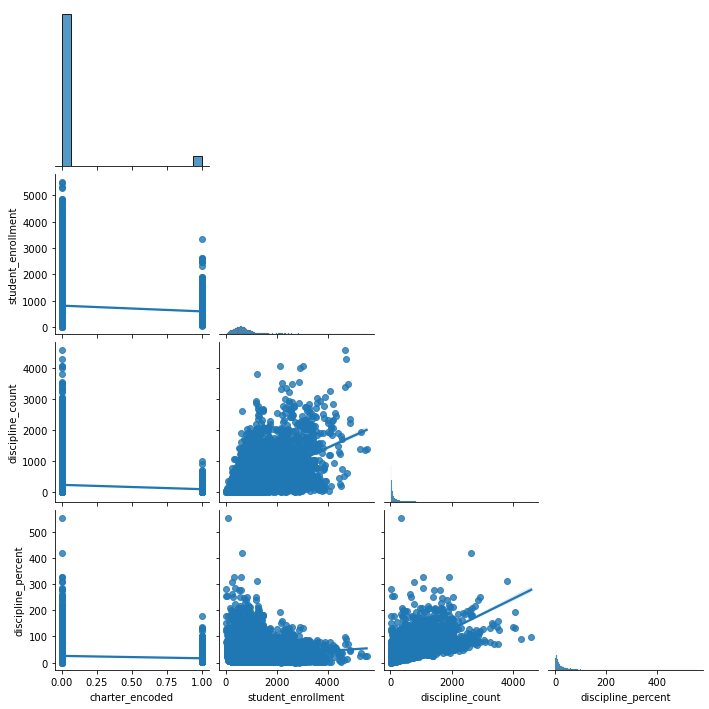

In [35]:
sns.pairplot(data=train, kind="reg", corner=True)

In [36]:
num_vars = ['student_enrollment', 'discipline_count' 'discipline_percent']
cat_vars = ['campus', 'charter_encoded']

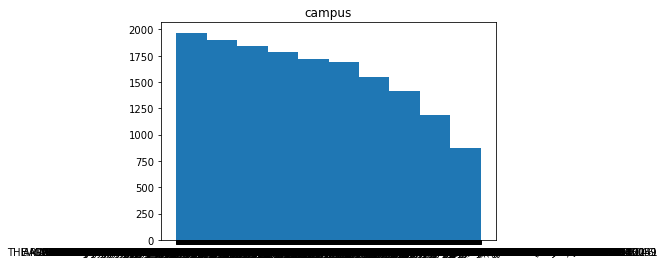

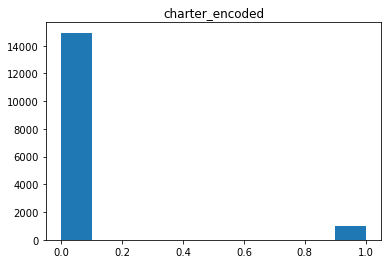

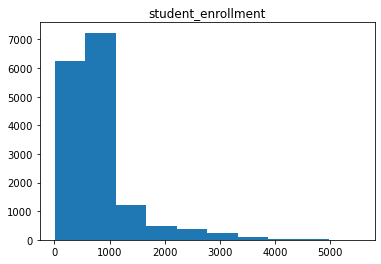

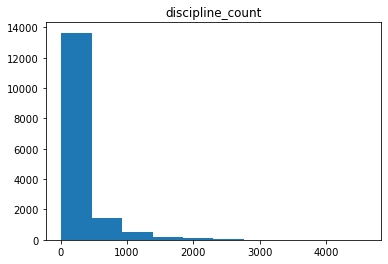

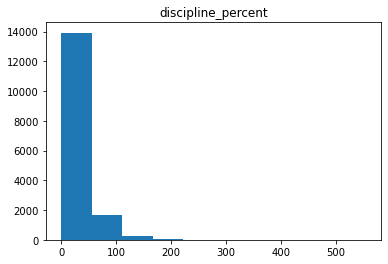

In [37]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

campus
MATTHYS EL 101917134                            5
VENUS PRI 126908102                             5
YORK J H 170902049                              5
HALTOM MIDDLE 220902041                         5
EHRHART SCHOOL 123805001                        5
                                               ..
CROWLEY MIDDLE 220912042                        1
HERMLEIGH SCHOOL 208901001                      1
JHW INSPIRE ACADEMY - WILLIAMS HOU 015808011    1
AMBASSADORS PREPARATORY ACADEMY 084804101       1
IDEA ROUND ROCK TECH ACADEMY 108807300          1
Name: campus, Length: 7049, dtype: int64
MATTHYS EL 101917134                            0.031411
VENUS PRI 126908102                             0.031411
YORK J H 170902049                              0.031411
HALTOM MIDDLE 220902041                         0.031411
EHRHART SCHOOL 123805001                        0.031411
                                                  ...   
CROWLEY MIDDLE 220912042                        0.006282
HER

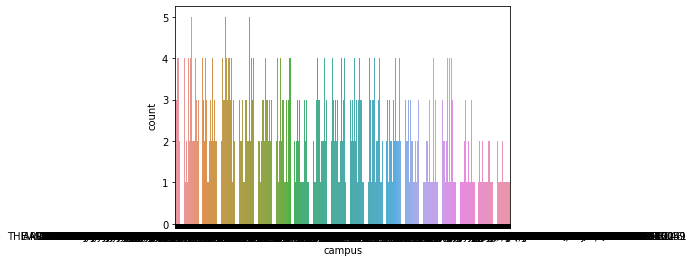

charter_encoded
0    14940
1      978
Name: charter_encoded, dtype: int64
0    93.856012
1     6.143988
Name: charter_encoded, dtype: float64


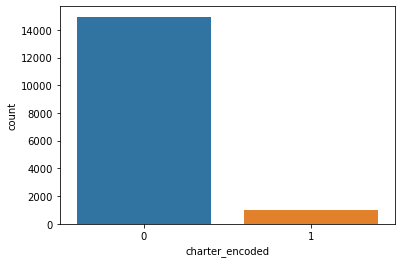

In [38]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

In [39]:
978/15918

0.06143987938183189

In [40]:
14940/15918

0.9385601206181681

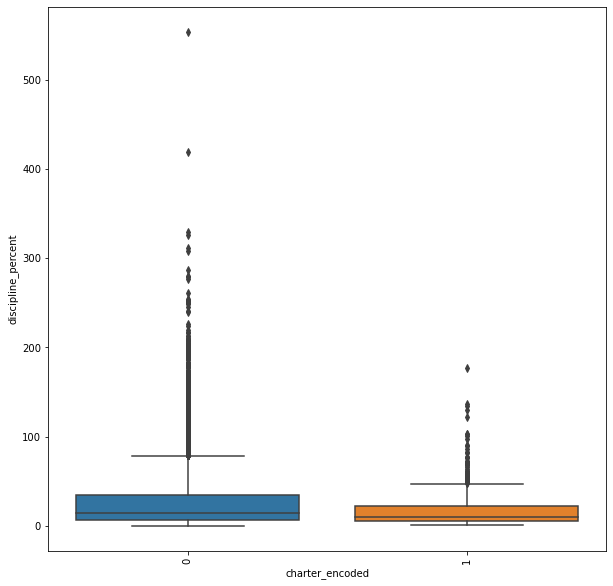

In [41]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=train['charter_encoded'], y=train['discipline_percent']);
plt.xticks(rotation = 90)
plt.show()

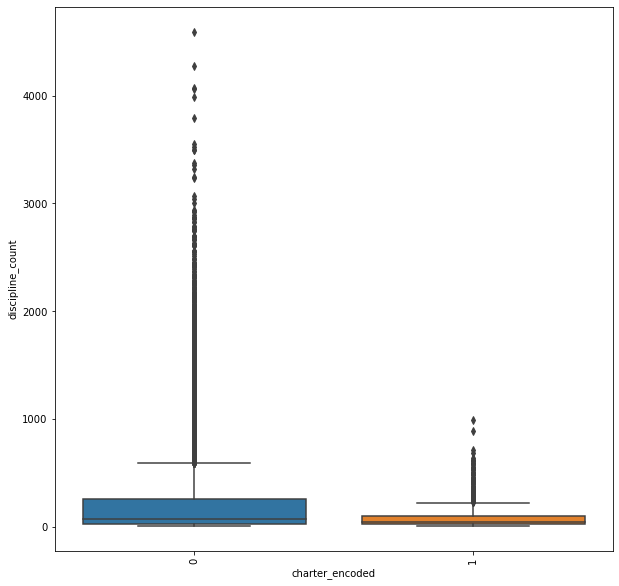

In [42]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=train['charter_encoded'], y=train['discipline_count']);
plt.xticks(rotation = 90)
plt.show()

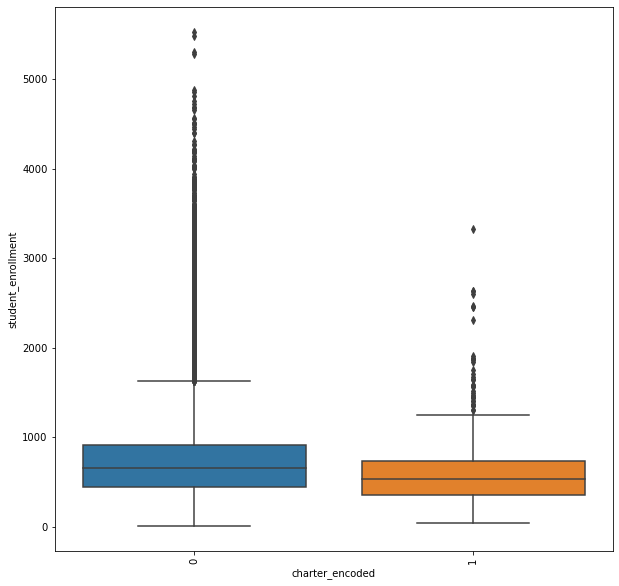

In [43]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=train['charter_encoded'], y=train['student_enrollment']);
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='student_enrollment', ylabel='discipline_count'>

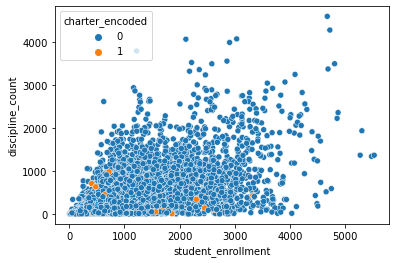

In [44]:
sns.scatterplot(x='student_enrollment', y='discipline_count', data=train, hue='charter_encoded')

<AxesSubplot:xlabel='discipline_percent', ylabel='Count'>

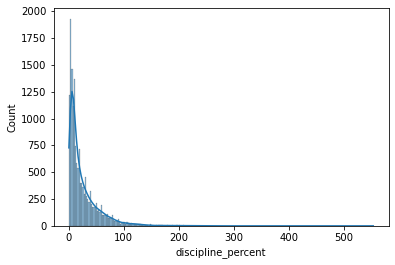

In [45]:
sns.histplot(x='discipline_percent', data=train, kde=True)

<AxesSubplot:>

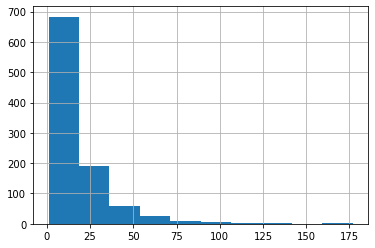

In [46]:
# histogram of churned customers
charterdiscp = train[train.charter_encoded==1].discipline_percent
charterdiscp.hist()

<AxesSubplot:>

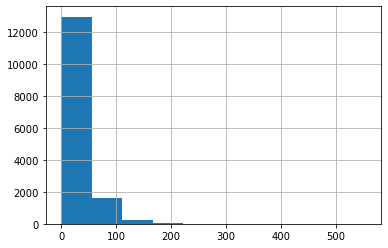

In [47]:
# histogram of non-churned customers
non_charterdiscp = train[train.charter_encoded==0].discipline_percent
non_charterdiscp.hist()

Hypothesis
Null H: Mean of disciplined students is the same for charter schools and traditional schools. Alt H: Mean of disciplined students is not the same for charter schools and traditional schools.

In [48]:
mean_a = charterdiscp.mean()
mean_b = non_charterdiscp.mean()

In [49]:
mean_a, mean_b

(16.685071574642127, 25.763253012048192)

In [50]:
# remember that our confidence level determines our alpha, 
# which we use to compare to p
alpha = 0.05

In [51]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
stat, pval = stats.levene(charterdiscp, non_charterdiscp)

In [52]:
stat, pval

(87.10592642169593, 1.1614599401392916e-20)

In [53]:
# implications of one-tailed two-sampled t-test:
# p will be divided by two because we are only looking at one tail of the curve
# we will pay attention to the sign of our t-statistic
# t, p = t-test: (group A, group B) ==> comparison of mu_a > mu_b
t, p = stats.ttest_ind(charterdiscp, non_charterdiscp, equal_var=False)

In [54]:
t, p

(-14.134290589822502, 1.9771683419824536e-42)

In [55]:
print('Is p less than alpha? ', pval < alpha)

Is p less than alpha?  True


In [56]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [57]:
# assign the train variables
X_train_scaled = train[['student_enrollment','discipline_count','discipline_percent']]
y_train=train[['charter_encoded']]

#assign the validate variables
X_validate_scaled=validate[['student_enrollment','discipline_count','discipline_percent']]
y_validate=validate[['charter_encoded']]

# assign the test variables
X_test_scaled=test[['student_enrollment','discipline_count','discipline_percent']]
y_test=test[['charter_encoded']]

In [58]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale = ['student_enrollment','discipline_count','discipline_percent'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                           columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [59]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [60]:
train_scaled, validate_scaled, test_scaled

(                                             campus  charter_encoded  \
 14461                           IRVIN H S 071902008                0   
 15829                     VETERANS MIDDLE 108902046                0   
 21119                         LORENA HIGH 161907001                0   
 9136                             TIPPS EL 101907141                0   
 13930  YOUNG WOMEN'S STEAM ACADEMY AT BAL 057905352                0   
 ...                                             ...              ...   
 14048                       AUSTIN MIDDLE 057912045                0   
 19501                       WELLINGTON EL 061902130                0   
 25179                       CHANCELLOR EL 101903108                0   
 14289                        DENTON CREEK 061911003                0   
 12928                        CIBOLO GREEN 015910145                0   
 
        student_enrollment  discipline_count  discipline_percent  
 14461            0.233738          0.032511           

In [61]:
X_train_scaled.head()

,student_enrollment,discipline_count,discipline_percent
14461,1300.0,159.0,12.0
15829,949.0,1163.0,123.0
21119,530.0,71.0,13.0
9136,1022.0,120.0,12.0
13930,1290.0,97.0,8.0


In [62]:
y_train.value_counts()

charter_encoded
0                  14940
1                    978
dtype: int64

## Baseline

In [63]:
# The mode is a great baseline
baseline = y_train.mode()

In [64]:
baseline

,charter_encoded
0,0


In [65]:
X_train_scaled['baseline_prediction'] = 0
X_train_scaled

,student_enrollment,discipline_count,discipline_percent,baseline_prediction
14461,1300.0,159.0,12.0,0
15829,949.0,1163.0,123.0,0
21119,530.0,71.0,13.0,0
9136,1022.0,120.0,12.0,0
13930,1290.0,97.0,8.0,0
...,...,...,...,...
14048,1036.0,183.0,18.0,0
19501,837.0,12.0,1.0,0
25179,818.0,148.0,18.0,0
14289,48.0,34.0,71.0,0


In [66]:
actual = y_train
predictions = X_train_scaled.baseline_prediction

In [67]:
pd.crosstab(y_train['charter_encoded'], X_train_scaled.baseline_prediction)

baseline_prediction,0
charter_encoded,
0,14940
1,978


In [68]:
# Creates a boolean array where "No" becomes True and "Yes" becomes False
(y_train == 0)

,charter_encoded
14461,True
15829,True
21119,True
9136,True
13930,True
...,...
14048,True
19501,True
25179,True
14289,True


In [69]:
# Takes the .mean() of the boolean array that represents the proportion 
# that would also match our baseline prediction
(y_train == 0).mean() 

charter_encoded    0.93856
dtype: float64

In [70]:
X_validate_scaled['baseline_prediction'] = 0

In [71]:
X_test_scaled['baseline_prediction'] = 0

# Model: Decision Tree

## decision tree max depth=3

In [72]:
# Create the decision tree object and specify hyperparams
tree3 = DecisionTreeClassifier(max_depth = 3, random_state=123)

In [74]:
tree3.fit(X_train_scaled, y_train)

# Rudimentary visualization of model structure
print(export_text(tree3, feature_names=X_train_scaled.columns.tolist()))

|--- discipline_count <= 208.50
|   |--- student_enrollment <= 565.50
|   |   |--- discipline_percent <= 45.50
|   |   |   |--- class: 0
|   |   |--- discipline_percent >  45.50
|   |   |   |--- class: 0
|   |--- student_enrollment >  565.50
|   |   |--- student_enrollment <= 604.50
|   |   |   |--- class: 0
|   |   |--- student_enrollment >  604.50
|   |   |   |--- class: 0
|--- discipline_count >  208.50
|   |--- discipline_count <= 624.50
|   |   |--- student_enrollment <= 1050.50
|   |   |   |--- class: 0
|   |   |--- student_enrollment >  1050.50
|   |   |   |--- class: 0
|   |--- discipline_count >  624.50
|   |   |--- student_enrollment <= 488.00
|   |   |   |--- class: 0
|   |   |--- student_enrollment >  488.00
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'discipline_count <= 208.5\ngini = 0.115\nsamples = 15918\nvalue = [14940, 978]\nclass = 0'),
 Text(0.25, 0.625, 'student_enrollment <= 565.5\ngini = 0.141\nsamples = 11551\nvalue = [10672, 879]\nclass = 0'),
 Text(0.125, 0.375, 'discipline_percent <= 45.5\ngini = 0.166\nsamples = 5833\nvalue = [5300, 533]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.172\nsamples = 5456\nvalue = [4937, 519]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.072\nsamples = 377\nvalue = [363, 14]\nclass = 0'),
 Text(0.375, 0.375, 'student_enrollment <= 604.5\ngini = 0.114\nsamples = 5718\nvalue = [5372, 346]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.077\nsamples = 724\nvalue = [695, 29]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.119\nsamples = 4994\nvalue = [4677, 317]\nclass = 0'),
 Text(0.75, 0.625, 'discipline_count <= 624.5\ngini = 0.044\nsamples = 4367\nvalue = [4268, 99]\nclass = 0'),
 Text(0.625, 0.375, 'student_enrollment <= 1050.5\ngini = 0.065\nsamples = 2785\nvalue = [2691, 94

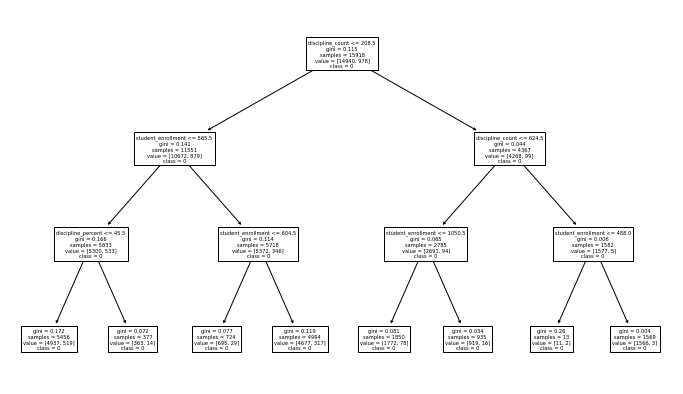

In [75]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree3, feature_names=X_train_scaled.columns, class_names=tree3.classes_.astype(str))
#plt.show()

In [76]:
y_pred3=tree3.predict(X_train_scaled)

In [77]:
y_pred_proba3 = tree3.predict_proba(X_train_scaled)


In [78]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree3.score(X_train_scaled, y_train)))

Accuracy of Decision Tree classifier on training set: 0.94


# Create a confusion matrix

In [79]:
tree3.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
predictions3 = tree3.predict(X_train_scaled)
actual3 = y_train

In [81]:
confusion_matrix(actual, predictions)

array([[14940,     0],
       [  978,     0]])

In [82]:
pd.crosstab(y_train['charter_encoded'], tree3.predict(X_train_scaled))

col_0,0
charter_encoded,
0,14940
1,978


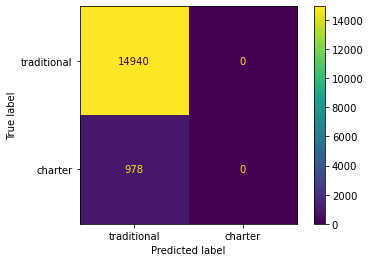

In [83]:
plot_confusion_matrix(tree3, X_train_scaled, y_train, display_labels=['traditional', 'charter'])


In [84]:
print(classification_report(actual3, predictions3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       0.00      0.00      0.00       978

    accuracy                           0.94     15918
   macro avg       0.47      0.50      0.48     15918
weighted avg       0.88      0.94      0.91     15918



## decision tree max depth=4

In [85]:
# Create the decision tree object and specify hyperparams
tree4 = DecisionTreeClassifier(max_depth = 4, random_state=123)

In [86]:
tree4

DecisionTreeClassifier(max_depth=4, random_state=123)

In [87]:
tree4.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=123)

In [88]:
# Rudimentary visualization of model structure
print(export_text(tree4, feature_names=X_train_scaled.columns.tolist()))

|--- discipline_count <= 208.50
|   |--- student_enrollment <= 565.50
|   |   |--- discipline_percent <= 45.50
|   |   |   |--- discipline_count <= 13.50
|   |   |   |   |--- class: 0
|   |   |   |--- discipline_count >  13.50
|   |   |   |   |--- class: 0
|   |   |--- discipline_percent >  45.50
|   |   |   |--- discipline_percent <= 67.50
|   |   |   |   |--- class: 0
|   |   |   |--- discipline_percent >  67.50
|   |   |   |   |--- class: 0
|   |--- student_enrollment >  565.50
|   |   |--- student_enrollment <= 604.50
|   |   |   |--- discipline_count <= 69.50
|   |   |   |   |--- class: 0
|   |   |   |--- discipline_count >  69.50
|   |   |   |   |--- class: 0
|   |   |--- student_enrollment >  604.50
|   |   |   |--- student_enrollment <= 605.50
|   |   |   |   |--- class: 0
|   |   |   |--- student_enrollment >  605.50
|   |   |   |   |--- class: 0
|--- discipline_count >  208.50
|   |--- discipline_count <= 624.50
|   |   |--- student_enrollment <= 1050.50
|   |   |   |--- stud

[Text(0.5, 0.9, 'discipline_count <= 208.5\ngini = 0.115\nsamples = 15918\nvalue = [14940, 978]\nclass = 0'),
 Text(0.25, 0.7, 'student_enrollment <= 565.5\ngini = 0.141\nsamples = 11551\nvalue = [10672, 879]\nclass = 0'),
 Text(0.125, 0.5, 'discipline_percent <= 45.5\ngini = 0.166\nsamples = 5833\nvalue = [5300, 533]\nclass = 0'),
 Text(0.0625, 0.3, 'discipline_count <= 13.5\ngini = 0.172\nsamples = 5456\nvalue = [4937, 519]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.228\nsamples = 631\nvalue = [548, 83]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.164\nsamples = 4825\nvalue = [4389, 436]\nclass = 0'),
 Text(0.1875, 0.3, 'discipline_percent <= 67.5\ngini = 0.072\nsamples = 377\nvalue = [363, 14]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.052\nsamples = 299\nvalue = [291, 8]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.142\nsamples = 78\nvalue = [72, 6]\nclass = 0'),
 Text(0.375, 0.5, 'student_enrollment <= 604.5\ngini = 0.114\nsamples = 5718\nvalue = [5372, 346]\nclass = 0'),
 Text(0.

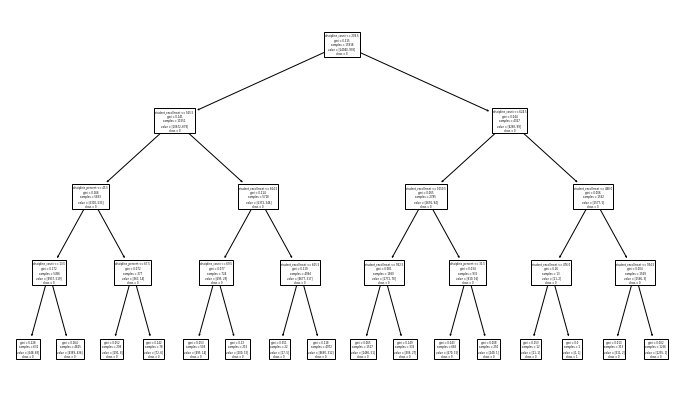

In [89]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree4, feature_names=X_train_scaled.columns, class_names=tree4.classes_.astype(str))
#plt.show()

In [90]:
y_pred4=tree4.predict(X_train_scaled)

In [91]:
y_pred_proba4 = tree4.predict_proba(X_train_scaled)

In [94]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree4.score(X_train_scaled, y_train)))

Accuracy of Decision Tree classifier on training set: 0.94


In [95]:
tree4.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
predictions4 = tree4.predict(X_train_scaled)

In [97]:
actual4 = y_train

In [98]:
confusion_matrix(actual4, predictions4)

array([[14940,     0],
       [  977,     1]])

In [99]:
pd.crosstab(y_train['charter_encoded'], tree4.predict(X_train_scaled))

col_0,0,1
charter_encoded,,
0,14940,0
1,977,1


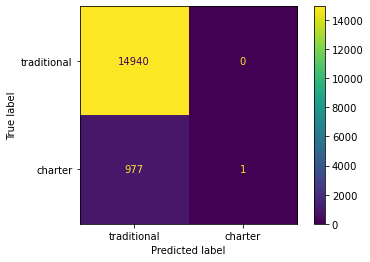

In [100]:
plot_confusion_matrix(tree4, X_train_scaled, y_train, display_labels=['traditional', 'charter'])


In [101]:
print(classification_report(actual4, predictions4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       1.00      0.00      0.00       978

    accuracy                           0.94     15918
   macro avg       0.97      0.50      0.49     15918
weighted avg       0.94      0.94      0.91     15918



## decision tree max depth=5

In [102]:
# Create the decision tree object and specify hyperparams
tree5 = DecisionTreeClassifier(max_depth = 5, random_state=123)

In [104]:
tree5.fit(X_train_scaled, y_train)

# Rudimentary visualization of model structure
print(export_text(tree5, feature_names=X_train_scaled.columns.tolist()))

|--- discipline_count <= 208.50
|   |--- student_enrollment <= 565.50
|   |   |--- discipline_percent <= 45.50
|   |   |   |--- discipline_count <= 13.50
|   |   |   |   |--- student_enrollment <= 318.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- student_enrollment >  318.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- discipline_count >  13.50
|   |   |   |   |--- discipline_percent <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- discipline_percent >  2.50
|   |   |   |   |   |--- class: 0
|   |   |--- discipline_percent >  45.50
|   |   |   |--- discipline_percent <= 67.50
|   |   |   |   |--- discipline_count <= 192.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- discipline_count >  192.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- discipline_percent >  67.50
|   |   |   |   |--- discipline_count <= 166.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- discipline_count >  166.50
|   |   |   |   |   |--- class: 0
|   |--- stu

[Text(0.51875, 0.9166666666666666, 'discipline_count <= 208.5\ngini = 0.115\nsamples = 15918\nvalue = [14940, 978]\nclass = 0'),
 Text(0.26666666666666666, 0.75, 'student_enrollment <= 565.5\ngini = 0.141\nsamples = 11551\nvalue = [10672, 879]\nclass = 0'),
 Text(0.13333333333333333, 0.5833333333333334, 'discipline_percent <= 45.5\ngini = 0.166\nsamples = 5833\nvalue = [5300, 533]\nclass = 0'),
 Text(0.06666666666666667, 0.4166666666666667, 'discipline_count <= 13.5\ngini = 0.172\nsamples = 5456\nvalue = [4937, 519]\nclass = 0'),
 Text(0.03333333333333333, 0.25, 'student_enrollment <= 318.5\ngini = 0.228\nsamples = 631\nvalue = [548, 83]\nclass = 0'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.324\nsamples = 231\nvalue = [184, 47]\nclass = 0'),
 Text(0.05, 0.08333333333333333, 'gini = 0.164\nsamples = 400\nvalue = [364, 36]\nclass = 0'),
 Text(0.1, 0.25, 'discipline_percent <= 2.5\ngini = 0.164\nsamples = 4825\nvalue = [4389, 436]\nclass = 0'),
 Text(0.08333333333333333

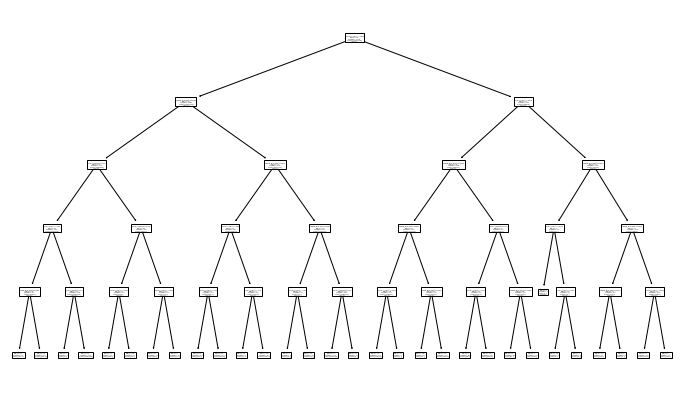

In [105]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree5, feature_names=X_train_scaled.columns, class_names=tree5.classes_.astype(str))
#plt.show()

In [106]:
y_pred5=tree5.predict(X_train_scaled)

In [107]:
y_pred_proba5 = tree5.predict_proba(X_train_scaled)

In [108]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree5.score(X_train_scaled, y_train)))

Accuracy of Decision Tree classifier on training set: 0.94


In [109]:
tree5.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
predictions5 = tree5.predict(X_train_scaled)
actual5 = y_train

In [112]:
confusion_matrix(actual5, predictions5)


array([[14939,     1],
       [  974,     4]])

In [113]:
pd.crosstab(y_train['charter_encoded'], tree5.predict(X_train_scaled))


col_0,0,1
charter_encoded,,
0,14939,1
1,974,4


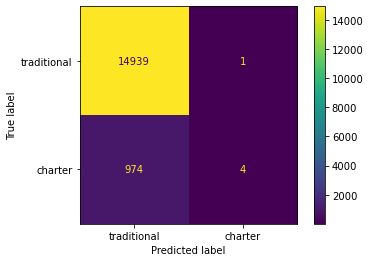

In [114]:
plot_confusion_matrix(tree5, X_train_scaled, y_train, display_labels=['traditional', 'charter'])


In [115]:
print(classification_report(actual5, predictions5))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       0.80      0.00      0.01       978

    accuracy                           0.94     15918
   macro avg       0.87      0.50      0.49     15918
weighted avg       0.93      0.94      0.91     15918



## best decision tree depth =4

In [116]:
print(classification_report(actual4, predictions4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       1.00      0.00      0.00       978

    accuracy                           0.94     15918
   macro avg       0.97      0.50      0.49     15918
weighted avg       0.94      0.94      0.91     15918



# Random Forest

## RF max depth=3

In [117]:
rf3 = RandomForestClassifier(max_depth=3, random_state=123)
rf3

RandomForestClassifier(max_depth=3, random_state=123)

In [118]:
rf3.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [119]:
print(rf3.feature_importances_)

[0.3770554  0.40514777 0.21779683 0.        ]


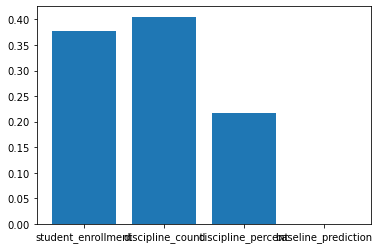

In [120]:
plt.bar(X_train_scaled.columns, rf3.feature_importances_)
plt.show()

In [122]:
y_pred3 = rf3.predict(X_train_scaled)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
y_pred_proba3 = rf3.predict_proba(X_train_scaled)
y_pred_proba3

array([[0.94528636, 0.05471364],
       [0.98842625, 0.01157375],
       [0.91168033, 0.08831967],
       ...,
       [0.93967668, 0.06032332],
       [0.93307993, 0.06692007],
       [0.93584494, 0.06415506]])

In [124]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf3.score(X_train_scaled, y_train)))

Accuracy of random forest classifier on training set: 0.94


In [125]:
cm3 = confusion_matrix(y_train, y_pred3)
print(cm3)

[[14940     0]
 [  978     0]]


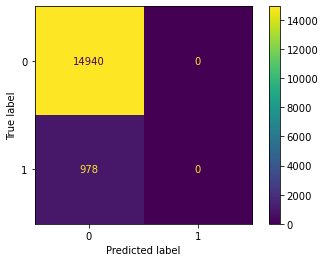

In [126]:
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=rf3.classes_)
disp3.plot()
plt.show()

In [127]:
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       0.00      0.00      0.00       978

    accuracy                           0.94     15918
   macro avg       0.47      0.50      0.48     15918
weighted avg       0.88      0.94      0.91     15918



## RF max depth=4

In [128]:
rf4 = RandomForestClassifier(max_depth=4, random_state=123)
rf4

RandomForestClassifier(max_depth=4, random_state=123)

In [129]:
rf4.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=4, random_state=123)

In [130]:
print(rf4.feature_importances_)

[0.39171052 0.36558438 0.2427051  0.        ]


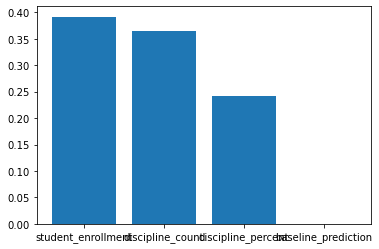

In [131]:
plt.bar(X_train_scaled.columns, rf4.feature_importances_)
plt.show()

In [132]:
y_pred4 = rf4.predict(X_train_scaled)
y_pred4

array([0, 0, 0, ..., 0, 0, 0])

In [133]:
y_pred_proba4 = rf4.predict_proba(X_train_scaled)
y_pred_proba4

array([[0.94889598, 0.05110402],
       [0.98994188, 0.01005812],
       [0.90686583, 0.09313417],
       ...,
       [0.93947709, 0.06052291],
       [0.94235478, 0.05764522],
       [0.93620301, 0.06379699]])

In [134]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf4.score(X_train_scaled, y_train)))

Accuracy of random forest classifier on training set: 0.94


In [135]:
cm4 = confusion_matrix(y_train, y_pred4)
print(cm4)

[[14940     0]
 [  978     0]]


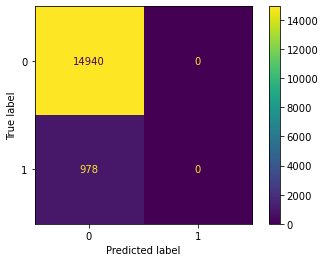

In [136]:
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=rf4.classes_)
disp4.plot()
plt.show()

In [137]:
print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       0.00      0.00      0.00       978

    accuracy                           0.94     15918
   macro avg       0.47      0.50      0.48     15918
weighted avg       0.88      0.94      0.91     15918



## RF max depth=5

In [138]:
rf5 = RandomForestClassifier(max_depth=5, random_state=123)
rf5

RandomForestClassifier(max_depth=5, random_state=123)

In [139]:
rf5.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=123)

In [140]:
print(rf5.feature_importances_)

[0.40336308 0.36356846 0.23306847 0.        ]


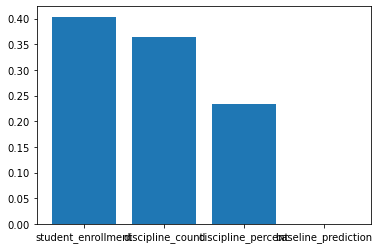

In [141]:
plt.bar(X_train_scaled.columns, rf5.feature_importances_)
plt.show()

In [142]:
y_pred5 = rf5.predict(X_train_scaled)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
y_pred_proba5 = rf5.predict_proba(X_train_scaled)
y_pred_proba5

array([[0.95768277, 0.04231723],
       [0.9927804 , 0.0072196 ],
       [0.90104253, 0.09895747],
       ...,
       [0.93966656, 0.06033344],
       [0.94793478, 0.05206522],
       [0.93808971, 0.06191029]])

In [144]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf5.score(X_train_scaled, y_train)))

Accuracy of random forest classifier on training set: 0.94


In [145]:
cm5 = confusion_matrix(y_train, y_pred5)
print(cm5)

[[14940     0]
 [  978     0]]


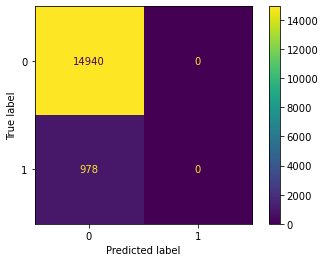

In [146]:
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=rf5.classes_)
disp5.plot()
plt.show()

In [147]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       0.00      0.00      0.00       978

    accuracy                           0.94     15918
   macro avg       0.47      0.50      0.48     15918
weighted avg       0.88      0.94      0.91     15918



# K-Nearest Neighbor

## n_neighbors=3

In [149]:
# weights = ['uniform', 'density']
knn3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [150]:
knn3.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [151]:
y_pred3 = knn3.predict(X_train_scaled)

In [152]:
y_pred_proba3 = knn3.predict_proba(X_train_scaled)

In [153]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn3.score(X_train_scaled, y_train)))

Accuracy of KNN classifier on training set: 0.94


In [154]:
print(confusion_matrix(y_train, y_pred3))

[[14865    75]
 [  823   155]]


In [155]:
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14940
           1       0.67      0.16      0.26       978

    accuracy                           0.94     15918
   macro avg       0.81      0.58      0.61     15918
weighted avg       0.93      0.94      0.93     15918



## n_neighbors=4

In [157]:
# weights = ['uniform', 'density']
knn4 = KNeighborsClassifier(n_neighbors=4, weights='uniform')

In [158]:
knn4.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [159]:
y_pred4 = knn4.predict(X_train_scaled)

In [160]:
y_pred_proba4 = knn4.predict_proba(X_train_scaled)

In [161]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn4.score(X_train_scaled, y_train)))

Accuracy of KNN classifier on training set: 0.94


In [162]:
print(confusion_matrix(y_train, y_pred4))

[[14934     6]
 [  959    19]]


In [163]:
print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       0.76      0.02      0.04       978

    accuracy                           0.94     15918
   macro avg       0.85      0.51      0.50     15918
weighted avg       0.93      0.94      0.91     15918



## n_neighbors=5

In [164]:
# weights = ['uniform', 'density']
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [165]:
knn5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [166]:
y_pred5 = knn5.predict(X_train_scaled)

In [167]:
y_pred_proba5 = knn5.predict_proba(X_train_scaled)

In [168]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn5.score(X_train_scaled, y_train)))

Accuracy of KNN classifier on training set: 0.94


In [169]:
print(confusion_matrix(y_train, y_pred5))

[[14923    17]
 [  947    31]]


In [170]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       0.65      0.03      0.06       978

    accuracy                           0.94     15918
   macro avg       0.79      0.52      0.51     15918
weighted avg       0.92      0.94      0.91     15918



# Logistic Regression

In [172]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [173]:
#  fit the model on train data
logit.fit(X_train_scaled, y_train)

LogisticRegression(C=1, random_state=123)

In [174]:
# now use the model to make predictions
y_predlr = logit.predict(X_train_scaled)

In [175]:
#take a look at predictions
y_predlr

array([0, 0, 0, ..., 0, 0, 0])

In [176]:
# look at predicted probabilites for first 10 observations
logit.predict_proba(X_train_scaled)[:10]

array([[0.95684353, 0.04315647],
       [0.99364805, 0.00635195],
       [0.9244573 , 0.0755427 ],
       [0.94634628, 0.05365372],
       [0.95114161, 0.04885839],
       [0.92040216, 0.07959784],
       [0.93525302, 0.06474698],
       [0.91313496, 0.08686504],
       [0.95086074, 0.04913926],
       [0.92218739, 0.07781261]])

In [177]:
logit.classes_

array([0, 1])

In [178]:
# View raw probabilities (output from the model)

y_pred_probalr = logit.predict_proba(X_train_scaled)
y_pred_probalr = pd.DataFrame(y_pred_proba, columns = ['traditional', 'charter'])
y_pred_probalr.head().round(3)

,traditional,charter
0,0.8,0.2
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [179]:
#classification report
print(classification_report(y_train, y_predlr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14940
           1       0.00      0.00      0.00       978

    accuracy                           0.94     15918
   macro avg       0.47      0.50      0.48     15918
weighted avg       0.88      0.94      0.91     15918



In [180]:
# look at model 1 coefficents
 
print('Coefficient: \n', logit.coef_[0])

Coefficient: 
 [-0.00056865 -0.00181194 -0.00301103  0.        ]


In [181]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train_scaled.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs

,coeffs
discipline_percent,-0.003011
discipline_count,-0.001812
student_enrollment,-0.000569
baseline_prediction,0.000000


In [182]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds


,coeffs
discipline_percent,0.996994
discipline_count,0.998190
student_enrollment,0.999432
baseline_prediction,1.000000


# classification report

There are four ways to check if the predictions are right or wrong:

TN / True Negative: the case was negative and predicted negative
TP / True Positive: the case was positive and predicted positive
FN / False Negative: the case was positive but predicted negative
FP / False Positive: the case was negative but predicted positive



Precision — What percent of your predictions were correct?
Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)


Recall — What proportion of actual positives was identified correctly?
Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?
F1 Score = 2*(Recall * Precision) / (Recall + Precision)


Support — Support is the number of actual occurrences of the class in the specified dataset.

